# InfecctionSimulator

> Bloc con sangría



El **Juego de la Vida**, también conocido como **Vida**, es un autómata celular diseñador por el matemático británico John Horton Conway en 1970. Es un juego sin jugadores, esto significa que su evolución está determinada por su estado inicial, sin requerir más entradas. Uno interactúa con el Juego de la Vida al crear un estado inicial (o configuración inicial) y se observa como evoluciona. Es Turing completo (puede simular cualquier máquina de Turing) y puede simular un constructor universal o cualquier otra máquina de Turing.

<center>
<img src="https://1.bp.blogspot.com/-pdQ2ckeQzCw/WwGFbYTKRoI/AAAAAAAAAY8/kb-gcutnkKc2TnQainAlYK5FlWmv87XywCPcBGAYYCw/s1600/ezgif.com-video-to-gif.gif" width=250 height=250 />
</center>

## Reglas

El universo (o entorno) del Juego de la Vida es infinito, cuadrícula ortogonal bidimensional de celdas cuadradas, cada una de ellas se encuentra con uno de dos posibles estados, vivo o muerto (poblado o despoblado, respectivamente). Cada celda interactúa con ocho vecinos, que son las celdas adyacentes horizontales, verticales y diagonales. En cada paso de tiempo, las siguientes transiciones ocurren:

1. Cualquier celda viva con menos de dos vecinos vivos muere, debido a la subpoblación.
2. Cualquier celda viva con dos o tres vecinos vivos sobrevive para la siguiente generación.
3. Cualquier celda con más de tres vecinos vivos muere, debido a la sobrepoblación.
4. Cualquier celda muerta con exactamente tres vecinos vivos se convierte en una celda viva, debido a la reproducción.

Estas reglas, que comparan el comportamiento del autómata a la vida real, pueden ser condensadas en lo siguiente:

1. Cualquier celda viva con dos o más vecinos vivos sobrevive.
2. Cualquier celda muerta con tres vecinos vivos se convierte en una celda viva.
3. Cualquier otra celda viva muere en la siguiente generación. De manera similar, cualquier otra celda muerta se queda muerta.

El patrón inicial constituye la semilla del sistema. La primera generación es creada al aplicar las reglas anteriores de manera simultanea a cualquier celda en la semilla, viva o muerta; nacimientos y muertes ocurren simultáneamente, y el momento discreto en el cual esto pasa es a veces llamado turno. Cada generación es una función pura de la anterior. Las reglas se aplican de forma repetida para crear nuevas generaciones.

In [ ]:
!python3 -m pip install mesa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 97.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 94.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.1/107.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar el juego de la vida usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [ ]:
# 'Model' sirve para definir los atributos a nivel del modelo, maneja los agentes
# 'Agent' es la unidad atómica y puede ser contenido en múltiples instancias en los modelos
from mesa import Agent, Model

# 'SingleGrid' sirve para forzar a un solo objeto por celda (nuestro objetivo en este "juego")
from mesa.space import SingleGrid

# 'SimultaneousActivation' habilita la opción de activar todos los agentes de manera simultanea.
from mesa.time import SimultaneousActivation

# 'DataCollector' permite obtener el grid completo a cada paso (o generación), útil para visualizar
from mesa.datacollection import DataCollector

# 'matplotlib' lo usamos para graficar/visualizar como evoluciona el autómata celular.
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mlp
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
mlp.rcParams['animation.embed_limit'] = 2**128

# Definimos los siguientes paquetes para manejar valores númericos: 'numpy' & 'pandas'
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime


## Crear el modelo

Antes que nada el presente modelo se encuentra basado en el [tutorial introductorio](https://mesa.readthedocs.io/en/latest/tutorials/intro_tutorial.html). Se modificó para que funcionara con el presente problema pero en esencia es lo mismo.

In [163]:
class InfectionAgent(Agent):
    def __init__(self, unique_id, model, initial_state):
        super().__init__(unique_id, model)
        self.state = initial_state
        self.next_state = None

    def step(self):
      neighbours = self.model.grid.get_neighbors(
        self.pos,
        moore=False,
        include_center=False)

      if self.state == 2:  # Enfermo
        self.next_state = self.state  # Permanece enfermo
      elif self.state == 1:  # Sano
        self.next_state = self.state  # Por defecto permanece sano
        # Verificamos si hay algún vecino enfermo, y en ese caso, nos infectamos.
        for neighbor in neighbours:
            if neighbor.state == 2:
                self.next_state = 2
                break
      elif self.state == 0:  # Vacío
        self.next_state = self.state #Permanece vacío

    def advance(self):
        self.state = self.next_state

class InfectionModel(Model):
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.reset()


    def reset(self):
      self.num_agents = self.width * self.height
      self.grid = SingleGrid(self.width, self.height, True)
      self.schedule = SimultaneousActivation(self)

      for (content, pos) in self.grid.coord_iter():
        x, y = pos
        initial_state = np.random.choice([0, 1, 2], p=[0.3, 0.65, 0.05])  # Agrega esta línea para generar un estado inicial
        agent = InfectionAgent((x, y), self, initial_state)  # Pasa initial_state como argumento
        self.grid.place_agent(agent, (x, y))
        self.schedule.add(agent)

      self.datacollector = DataCollector(
        model_reporters={"Grid": self.get_grid,
                         "Infected": self.get_infected}
    )

    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

    def get_grid(self):
      grid = np.zeros((self.grid.width, self.grid.height))
      for content, pos in self.grid.coord_iter():
        x, y = pos
        grid[x][y] = content.state
      return grid

    def get_infected(self):
      total_infected_agents = 0

        # Por todas las celdas del grid
      for cell in self.grid.coord_iter():
          agent, _ = cell
          if isinstance(agent, InfectionAgent):
            total_infected_agents += agent.state

      return total_infected_agents



# Ejecución del modelo
A continuación corremos el modelo

In [164]:
# Definimos el tamaño del Grid ..> 100 x 100
GRID_SIZE = 100

# Definimos el número de generaciones a correr
NUM_GENERATIONS = 25

# Registramos el tiempo de inicio y corremos el modelo
start_time = time.time()

model = InfectionModel(GRID_SIZE, GRID_SIZE)  # Nota: Aquí se usa InfectionModel en lugar de InfectionAgent
for i in range(NUM_GENERATIONS):
    model.step()
final_time = time.time()

# Imprimimos el tiempo que le tomó correr al modelo.
print('Tiempo de ejecución:', str(datetime.timedelta(seconds=(final_time - start_time))))


Tiempo de ejecución: 0:00:01.476037


Obtenemos la información que almacenó el colector, este nos entregará un DataFrame de pandas que contiene toda la información.

In [165]:
all_grids = model.datacollector.get_model_vars_dataframe()


Graficamos la información usando `matplotlib`

In [166]:
all_grids


,Grid,Infected
0,"[[1.0, 1.0, 1.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0,...",7517
1,"[[1.0, 1.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0,...",8711
2,"[[1.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 1.0,...",10168
3,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 1.0, 1.0, 2.0,...",11429
4,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",12378
5,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",13001
6,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",13415
7,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",13682
8,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",13827
9,"[[2.0, 2.0, 2.0, 2.0, 0.0, 0.0, 2.0, 2.0, 2.0,...",13894


In [167]:
%%capture

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7,7))

axs.set_xticks([])
axs.set_yticks([])

# Definimos los colores para las celdas: blanco para vacías, verde para sanas y rojo para infectadas.
colors = []
colors.append(np.array([1, 1, 1, 1]))  # Blanco
colors.append(np.array([0, 1, 0, 1]))  # Verde
colors.append(np.array([1, 0, 0, 1]))  # Rojo
colormap = mlp.colors.ListedColormap(colors)

# Obtener el primer grid del modelo para inicializar la animación.
all_grids = model.datacollector.get_model_vars_dataframe()
patch_grid = axs.imshow(all_grids['Grid'].iloc[0], cmap=colormap, vmin=0, vmax=2)

cells_infected = []
def animate(i):
    patch_grid.set_data(all_grids['Grid'].iloc[i])
    cells_infected.append(all_grids['Infected'].iloc[i])
anim = animation.FuncAnimation(fig, animate, frames=NUM_GENERATIONS)


In [168]:
anim

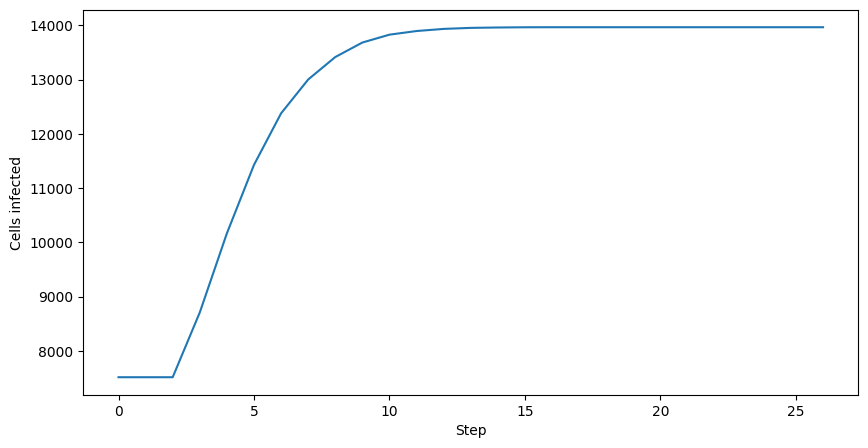

In [171]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Cells infected")

plt.plot(cells_infected)
plt.show()

# Batch simulation

In [170]:
NUM_REPS = 100
GRID_SIZE = 10
NUM_GENERATIONS = 1000

model = InfectionModel(GRID_SIZE, GRID_SIZE)

batch_data = dict(time=[], infected=[])
for _ in range(NUM_REPS):
    start_time = time.time()

    model.reset()
    for i in range(NUM_GENERATIONS):
        model.step()
    final_time = time.time()

    all_grids = model.datacollector.get_model_vars_dataframe()

    batch_data['time'].append(final_time - start_time)
    batch_data['infected'].append(all_grids['Infected'].to_numpy())


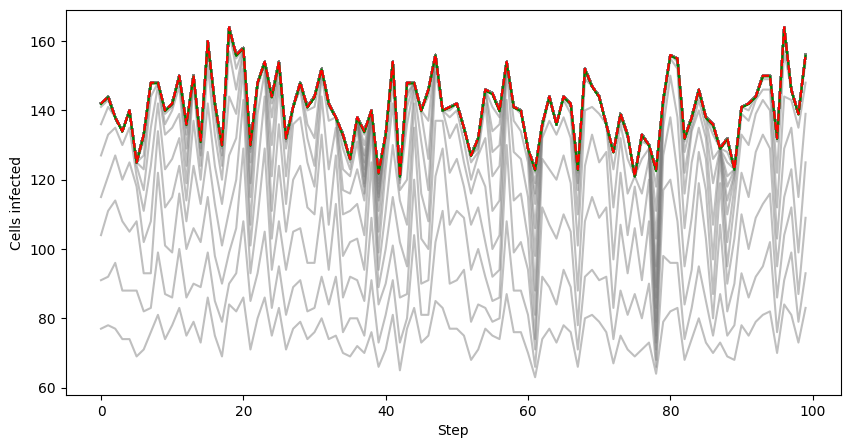

In [172]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

axs.set_xlabel("Step")
axs.set_ylabel("Cells infected")

#axs.set_prop_cycle('color', list(plt.cm.(np.linspace(0, 1, NUM_REPS))))
plt.plot(batch_data['infected'], color='Grey', alpha=0.5)

plt.plot(np.average(np.array(batch_data['infected']), axis=1), color='Green')
plt.plot(np.median(np.array(batch_data['infected']), axis=1), color='Red', linestyle='dashed')

plt.show()